# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.142  1  0.260 0.611 0.001   
                             age        0.043  1  0.079 0.780 0.000   
                             Kiel       1.681  1  3.081 0.081 0.016   
                             Magdeburg  5.002  1  9.167 0.003 0.046   
                             Sweden     7.894  1 14.469 0.000 0.070   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.470  1  0.473 0.492 0.002   
                             age        1.447  1  1.455 0.229 0.008   
                             Kiel       0.057  1  0.057 0.811 0.000   
                             Magdeburg  2.836  1  2.852 0.093 0.015   
                             Sweden    14.184  1 14.266 0.000 0.069   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.214  0.742    False  
                             age               0.108  0.865    False  
                             Kiel              1.093  0.176    False  
                             Magdeburg         2.552  0.012     True  
                             Sweden            3.717  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.308  0.644    False  
                             age               0.640  0.383    False  
                             Kiel              0.091  0.886    False  
                             Magdeburg         1.032  0.196    False  
                             Sweden            3.674  0.001     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.720  1  4.607 0.033 0.024   
                             age        0.013  1  0.085 0.771 0.000   
                             Kiel       0.400  1  2.559 0.111 0.013   
                             Magdeburg  0.858  1  5.489 0.020 0.028   
                             Sweden     2.212  1 14.158 0.000 0.069   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         3.534  1  1.766 0.185 0.009   
                             age        1.414  1  0.707 0.402 0.004   
                             Kiel      11.143  1  5.569 0.019 0.028   
                             Magdeburg 20.085  1 10.038 0.002 0.050   
                             Sweden     0.471  1  0.236 0.628 0.001   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.480  0.082    False  
                             age               0.113  0.850    False  
                             Kiel              0.953  0.216    False  
                             Magdeburg         1.695  0.055    False  
                             Sweden            3.651  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.732  0.318    False  
                             age               0.396  0.552    False  
                             Kiel              1.715  0.053    False  
                             Magdeburg         2.748  0.007     True  
                             Sweden            0.202  0.741    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.611         0.214  0.742    False   
                             age       0.780         0.108  0.865    False   
                             Kiel      0.081         1.093  0.176    False   
                             Magdeburg 0.003         2.552  0.012     True   
                             Sweden    0.000         3.717  0.001     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.492         0.308  0.644    False   
                             age       0.229         0.640  0.383    False   
                             Kiel      0.811         0.091  0.886    False   
                             Magdeburg 0.093         1.032  0.196    False   
                             Sweden    0.000         3.674  0.001     True   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.033         1.480  0.082    False  
                             age       0.771         0.113  0.850    False  
                             Kiel      0.111         0.953  0.216    False  
                             Magdeburg 0.020         1.695  0.055    False  
                             Sweden    0.000         3.651  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.185         0.732  0.318    False  
                             age       0.402         0.396  0.552    False  
                             Kiel      0.019         1.715  0.053    False  
                             Magdeburg 0.002         2.748  0.007     True  
                             Sweden    0.628         0.202  0.741    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.260         2.488     0.336     0.246         2.746     0.313
std       0.302         5.327     0.330     0.297         5.178     0.325
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.337     0.015     0.002         0.362     0.008
50%       0.119         0.925     0.238     0.095         1.021     0.190
75%       0.460         2.430     0.614     0.435         2.715     0.580
max       1.000       148.908     1.000     1.000        85.372     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.611         0.214   
A0A024R0T9;K7ER74;P02655                           AD     0.062         1.208   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.070         1.155   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.717         0.144   
A0A075B6H7                                         AD     0.058         1.239   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.005         2.282   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.255         0.594   
S4R3U6                                             AD     0.492         0.308   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.742    False   
A0A024R0T9;K7ER74;P02655                           AD      0.144    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.157    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.819    False   
A0A075B6H7                                         AD      0.135    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.020     True   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.413    False   
S4R3U6                                             AD      0.644    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.033         1.480   
A0A024R0T9;K7ER74;P02655                           AD     0.029         1.539   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.300         0.523   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.305         0.516   
A0A075B6H7                                         AD     0.121         0.918   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.023         1.630   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.479         0.320   
S4R3U6                                             AD     0.185         0.732   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.082    False  
A0A024R0T9;K7ER74;P02655                           AD      0.073    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.451    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.456    False  
A0A075B6H7                                         AD      0.229    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.255         1.411     0.337     0.247         1.489     0.321
std       0.292         1.641     0.318     0.288         1.765     0.313
min       0.000         0.002     0.000     0.000         0.002     0.000
25%       0.011         0.350     0.036     0.009         0.361     0.029
50%       0.123         0.910     0.244     0.111         0.955     0.215
75%       0.447         1.954     0.603     0.436         2.030     0.580
max       0.996        21.501     0.998     0.994        23.792     0.996

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1020,997


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.611         0.214  0.742   
A0A024R0T9;K7ER74;P02655                           0.062         1.208  0.144   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.070         1.155  0.157   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.717         0.144  0.819   
A0A075B6H7                                         0.058         1.239  0.135   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.005         2.282  0.020   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.255         0.594  0.413   
S4R3U6                                             0.492         0.308  0.644   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.033   
A0A024R0T9;K7ER74;P02655                              False 0.029   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.300   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.305   
A0A075B6H7                                            False 0.121   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                 True 0.023   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.479   
S4R3U6                                                False 0.185   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.480  0.082   
A0A024R0T9;K7ER74;P02655                                   1.539  0.073   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.523  0.451   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.516  0.456   
A0A075B6H7                                                 0.918  0.229   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.304   
Q9Y6X5                                                     1.630  0.062   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.172   
Q9Y6Y9                                                     0.320  0.618   
S4R3U6                                                     0.732  0.318   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    962
PI (yes) - QRILC (yes)   366
PI (no)  - QRILC (yes)    58
PI (yes) - QRILC (no)     35
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                       \
                                             p-unc -Log10 pvalue qvalue   
protein groups                                                            
A0A075B6I0                                   0.031         1.512  0.082   
A0A087WVV2;A0A0A0MRV0;Q9P2E9;Q9P2E9-2;V9GY78 0.052         1.285  0.124   
A0A087WWT2;Q9NPD7                            0.028         1.549  0.077   
A0A087WXB8;Q9Y274                            0.006         2.201  0.023   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2     0.004         2.420  0.015   
...                                            ...           ...    ...   
Q9NUQ9                                       0.278         0.556  0.438   
Q9NYX4                                       0.043         1.363  0.108   
Q9UNW1                                       0.012         1.914  0.039   
Q9UQ52                                       0.035         1.460  0.091   
Q9Y6X5                                       0.005         2.282  0.020   

                                                      QRILC                \
                                             rejected p-unc -Log10 pvalue   
protein groups                                                              
A0A075B6I0                                      False 0.003         2.553   
A0A087WVV2;A0A0A0MRV0;Q9P2E9;Q9P2E9-2;V9GY78    False 0.015         1.837   
A0A087WWT2;Q9NPD7                               False 0.005         2.341   
A0A087WXB8;Q9Y274                                True 0.049         1.307   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2         True 0.046         1.335   
...                                               ...   ...           ...   
Q9NUQ9                                          False 0.002         2.686   
Q9NYX4                                          False 0.007         2.183   
Q9UNW1                                           True 0.210         0.679   
Q9UQ52                                          False 0.004         2.439   
Q9Y6X5                                           True 0.023         1.630   

                                                                  data  
                                             qvalue rejected frequency  
protein groups                                                          
A0A075B6I0                                    0.011     True       194  
A0A087WVV2;A0A0A0MRV0;Q9P2E9;Q9P2E9-2;V9GY78  0.042     True       185  
A0A087WWT2;Q9NPD7                             0.016     True       193  
A0A087WXB8;Q9Y274                             0.112    False        89  
A0A087X152;D6RE16;E0CX15;O95185;O95185-2      0.106    False       176  
...                                             ...      ...       ...  
Q9NUQ9                                        0.008     True       114  
Q9NYX4                                        0.022     True       195  
Q9UNW1                                        0.349    False       171  
Q9UQ52                                        0.013     True       188  
Q9Y6X5                                        0.062    False       173  

[93 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.742,0.082,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.144,0.073,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.157,0.451,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.819,0.456,196,PI (no) - QRILC (no)
A0A075B6H7,0.135,0.229,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.316,0.304,197,PI (no) - QRILC (no)
Q9Y6X5,0.020,0.062,173,PI (yes) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.172,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.773,0.022,86,PI (no) - QRILC (yes),0.751
P17302,0.729,0.036,135,PI (no) - QRILC (yes),0.694
P63167;Q96FJ2,0.658,0.002,137,PI (no) - QRILC (yes),0.656
P36269;P36269-2;P36269-3,0.001,0.602,54,PI (yes) - QRILC (no),0.600
G3V295;G3V3I1;G3V5Z7;P60900,0.548,0.002,95,PI (no) - QRILC (yes),0.546
...,...,...,...,...,...
Q9BS26,0.053,0.043,123,PI (no) - QRILC (yes),0.010
Q16706,0.055,0.047,195,PI (no) - QRILC (yes),0.008
Q8WYK1,0.048,0.055,109,PI (yes) - QRILC (no),0.007


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


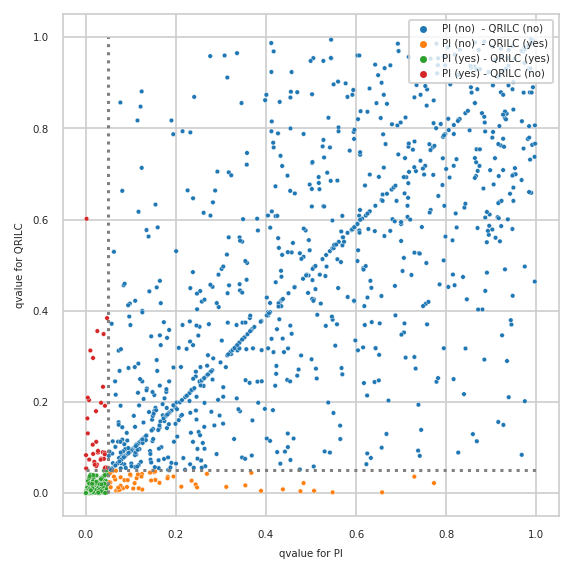

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


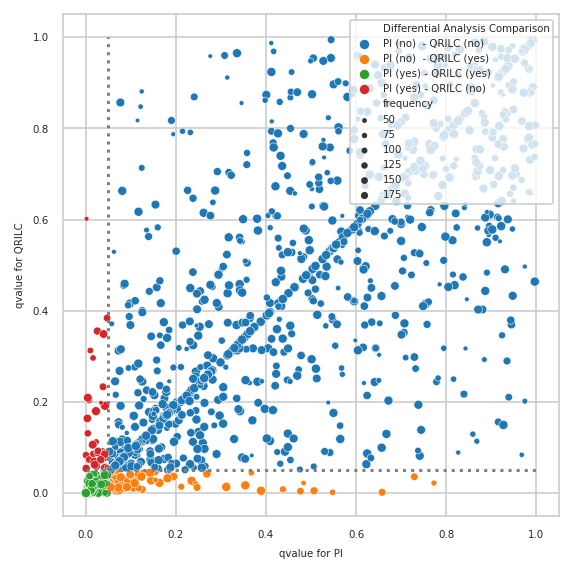

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/pimms/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out